<a href="https://colab.research.google.com/github/kartikrupal/Hate-Speech/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE

Loading Dataset

In [2]:
# Install this in your environment if not already done
# pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# File inside the dataset
file_path = "labeled_data.csv"

# Load the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mrmorj/hate-speech-and-offensive-language-dataset",
    file_path
)

# Display the first few rows
print(df.head())


/tmp/ipython-input-2-79205389.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 1.01M/1.01M [00:00<00:00, 112MB/s]

Extracting zip of labeled_data.csv...
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [3]:
df.head(15)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [4]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

Dataset Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [7]:
df.drop(columns=['count','hate_speech','offensive_language','neither','Unnamed: 0'],inplace=True)

In [8]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


removing all the special characters

In [9]:
df['New_tweet']=df['tweet'].str.replace(r'[^a-zA-Z]',' ',regex=True)

In [10]:
df

,class,tweet,New_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...
...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie LifeAsKing ...
24779,2,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby an...
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [11]:
df['New_tweet'].iloc[5]

'                    T Madison x  The shit just blows me  claim you so faithful and down for somebody but still fucking with hoes                              '

In [12]:
df['New_tweet']=df['New_tweet'].str.replace(r'[\s]+',' ',regex=True)

In [13]:
df

,class,tweet,New_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me ...
...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie LifeAsKing Pearls corey ...
24779,2,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby and...
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like I aint fu...
24781,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [14]:
df['New_tweet'].iloc[5]

' T Madison x The shit just blows me claim you so faithful and down for somebody but still fucking with hoes '

In [15]:
df.drop(columns=['tweet'],inplace=True)

In [16]:
df

,class,New_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...
...,...,...
24778,1,you s a muthaf in lie LifeAsKing Pearls corey ...
24779,2,you ve gone and broke the wrong heart baby and...
24780,1,young buck wanna eat dat nigguh like I aint fu...
24781,1,youu got wild bitches tellin you lies


***NLP PROCESSING***

In [17]:
import spacy

In [18]:
nlp=spacy.load('en_core_web_sm')


In [19]:
def lemmatization(text):
  doc=nlp(text)
  lemmatized = [word.lemma_ for word in doc]
  return " ".join(lemmatized)


In [20]:
text="kartik is in 3rd year"
lemmatization(text)

'kartik be in 3rd year'

In [21]:
df['processed_text']=df['New_tweet'].apply(lemmatization)

In [22]:
df.head(10)

,class,New_tweet,processed_text
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...
5,1,T Madison x The shit just blows me claim you ...,T Madison x the shit just blow I claim you s...
6,1,BrighterDays I can not just sit up and HATE o...,BrighterDays I can not just sit up and HATE ...
7,1,selfiequeenbri cause I m tired of you big bit...,selfiequeenbri cause I m tired of you big bi...
8,1,amp you might not get ya bitch back amp thats...,amp you might not get ya bitch back amp that...
9,1,rhythmixx hobbies include fighting Mariam bitch,rhythmixx hobby include fight Mariam bitch


In [23]:
def stop_removal(text):
  doc=nlp(text)
  filtered_tokens = [token.text for token in doc if not token.is_stop]
  return " ".join(filtered_tokens)

In [24]:
df['processed_text_2']=df['processed_text'].apply(stop_removal)

In [25]:
df

,class,New_tweet,processed_text,processed_text_2
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...
...,...,...,...,...
24778,1,you s a muthaf in lie LifeAsKing Pearls corey ...,you s a muthaf in lie lifeaske Pearls corey em...,s muthaf lie lifeaske Pearls corey emanuel rig...
24779,2,you ve gone and broke the wrong heart baby and...,you ve go and break the wrong heart baby and d...,ve break wrong heart baby drive redneck crazy
24780,1,young buck wanna eat dat nigguh like I aint fu...,young buck wanna eat dat nigguh like I be not ...,young buck wanna eat dat nigguh like fuckin dis
24781,1,youu got wild bitches tellin you lies,youu get wild bitch tellin you lie,youu wild bitch tellin lie


In [26]:
df.drop(columns=['New_tweet','processed_text'],inplace=True)

In [27]:
df

,class,processed_text_2
0,2,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts shit hear true faker bitc...
...,...,...
24778,1,s muthaf lie lifeaske Pearls corey emanuel rig...
24779,2,ve break wrong heart baby drive redneck crazy
24780,1,young buck wanna eat dat nigguh like fuckin dis
24781,1,youu wild bitch tellin lie


In [28]:
df = df.rename(columns={'processed_text_2': 'content'})
df

,class,content
0,2,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts shit hear true faker bitc...
...,...,...
24778,1,s muthaf lie lifeaske Pearls corey emanuel rig...
24779,2,ve break wrong heart baby drive redneck crazy
24780,1,young buck wanna eat dat nigguh like fuckin dis
24781,1,youu wild bitch tellin lie


In [29]:
df['content'].iloc[67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

**ONE HOT ENCODING**

In [30]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
vocab_size=10000
one_hot_representation=[ one_hot(words,vocab_size) for words in df['content']]

In [32]:
for i in range(6):
  print(df['content'].iloc[i])

   RT mayasolovely woman shouldn t complain clean house amp man trash
   RT mleew boy dat cold tyga dwn bad cuffin dat hoe st place
   RT UrKindOfBrand Dawg RT sbaby life fuck bitch start cry confuse shit
   RT C G Anderson viva base look like tranny
   RT ShenikaRoberts shit hear true faker bitch tell ya
   T Madison x shit blow claim faithful somebody fuck hoe


In [33]:
for i in range(6):
  print(one_hot_representation[i])


[2299, 9924, 4118, 3521, 9429, 2226, 110, 9853, 6294, 5797, 9672]
[2299, 5199, 2610, 4361, 5118, 1293, 7099, 158, 3844, 4361, 7924, 5135, 8212]
[2299, 1014, 1532, 2299, 8632, 7407, 9969, 7341, 2522, 3029, 4370, 4880]
[2299, 6300, 7264, 6479, 6247, 7045, 879, 567, 7106]
[2299, 4250, 4880, 5535, 2887, 5970, 7341, 6299, 6915]
[9429, 9998, 3052, 4880, 663, 863, 410, 9945, 9969, 7924]


In [34]:
sentence_length= 20
embedded_tweet=pad_sequences(one_hot_representation,padding='pre',maxlen=sentence_length)

In [35]:
for i in range(6):
  print(embedded_tweet[i])


[   0    0    0    0    0    0    0    0    0 2299 9924 4118 3521 9429
 2226  110 9853 6294 5797 9672]
[   0    0    0    0    0    0    0 2299 5199 2610 4361 5118 1293 7099
  158 3844 4361 7924 5135 8212]
[   0    0    0    0    0    0    0    0 2299 1014 1532 2299 8632 7407
 9969 7341 2522 3029 4370 4880]
[   0    0    0    0    0    0    0    0    0    0    0 2299 6300 7264
 6479 6247 7045  879  567 7106]
[   0    0    0    0    0    0    0    0    0    0    0 2299 4250 4880
 5535 2887 5970 7341 6299 6915]
[   0    0    0    0    0    0    0    0    0    0 9429 9998 3052 4880
  663  863  410 9945 9969 7924]


In [36]:
X=np.array(embedded_tweet)
y=np.array(df['class'])
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


Fixing the inconsistent data oversampling

In [37]:
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)


***Model Building***

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X.shape,X_train.shape,X_test.shape

((42543, 20), (34034, 20), (8509, 20))

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
dimension =50
model=keras.Sequential([
    layers.Embedding(vocab_size,dimension,input_length=sentence_length),
    #lstm
    layers.LSTM(128,return_sequences=True),
    layers.LSTM(64,return_sequences=True),
    layers.LSTM(64),

    layers.Dense(3,activation="softmax")
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7716 - loss: 0.5153 - val_accuracy: 0.9235 - val_loss: 0.2240
Epoch 2/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9459 - loss: 0.1680 - val_accuracy: 0.9187 - val_loss: 0.2364
Epoch 3/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9618 - loss: 0.1201 - val_accuracy: 0.9162 - val_loss: 0.2682
Epoch 4/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9737 - loss: 0.0909 - val_accuracy: 0.9080 - val_loss: 0.3241
Epoch 5/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9772 - loss: 0.0745 - val_accuracy: 0.9067 - val_loss: 0.3635
Epoch 6/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9836 - loss: 0.0544 - val_accuracy: 0.9062 - val_loss: 0.4271
Epoch 7/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9860 - loss: 0.0458 - val_accuracy: 0.8959 - val_loss: 0.5256
Epoch 8/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9914 - loss: 0.0

In [44]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Accuracy Of Model:{accuracy*100}")

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8999 - loss: 0.6711
Accuracy Of Model:89.3759548664093


In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create and configure the tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")

# Fit the tokenizer on training data (this is just a placeholder; use your actual data)
tokenizer.fit_on_texts([
    "This is an example sentence.",
    "Another sentence to train the tokenizer.",
    "Add more training data based on your dataset."
])

# Input text for prediction
text = ["Go back to where you came from. You don't belong here."]

# Convert input to sequences
seq = tokenizer.texts_to_sequences(text)

# Pad the sequence
padded = pad_sequences(seq, maxlen=20)

# Predict using your model
prediction = model.predict(padded)
pred=np.argmax((prediction),axis=-1)
if(pred==0):
 print("Hate Speech")
elif(pred==1):
  print("Offensive")
else:
  print("Neither")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Neither


266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


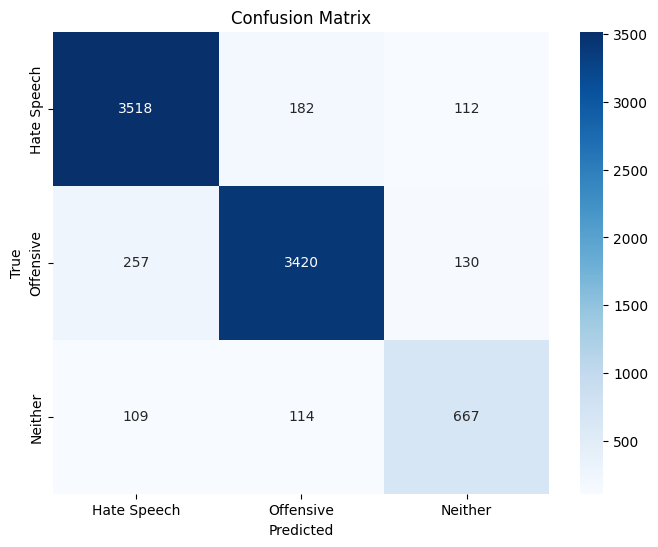

Classification Report:
              precision    recall  f1-score   support

 Hate Speech       0.91      0.92      0.91      3812
   Offensive       0.92      0.90      0.91      3807
     Neither       0.73      0.75      0.74       890

    accuracy                           0.89      8509
   macro avg       0.85      0.86      0.85      8509
weighted avg       0.89      0.89      0.89      8509



In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
prediction=model.predict(X_test)
# y_test: true labels
# y_pred_prob: model's predicted probabilities (from model.predict)
# Get class predictions (e.g., for softmax output)
y_pred = np.argmax(prediction, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Hate Speech', 'Offensive', 'Neither']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))


In [47]:
# --- After Data Cleaning and Before One-Hot Encoding ---

from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

# Define constants
VOCAB_SIZE = 10000
MAX_LEN = 20

# 1. Create and fit the tokenizer on your processed text
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df['content'])

# Save the tokenizer for later use in the web app
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# 2. Convert text to sequences and pad them
sequences = tokenizer.texts_to_sequences(df['content'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='pre')

# --- Then, continue with SMOTE and model training as you did ---
# X = np.array(padded_sequences)
# y = np.array(df['class'])
# ... smote, train_test_split, etc. ...

# 3. After training is complete, save the final model
model.save('hate_speech_model.h5')

print("✅ Model and Tokenizer have been saved successfully!")

✅ Model and Tokenizer have been saved successfully!
